<a href="https://colab.research.google.com/github/aditi10998/Netflix_movies_and_TV_shows/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### **Importing important libraries**

In [1]:
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime



# Importing matplotlib.pyplot 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
#Loading files from google drive to colab and storing in a variable.
File1="/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [68]:
#Creating Dataframes from csv files
Netflix_df=pd.read_csv(File1)

**Peek the Data**

In [69]:
Netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [70]:
Netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


From the above operations head() and tail().We can conclude that there are nan values in some columns like director,country,etc.

In [7]:
Netflix_df.shape

(7787, 12)

This dataset consists of 7787 rows and 12 columns

**Statistical Summary**

In [8]:
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


Since numerical column is release date we only get statistical summary of that column,Because by default describe only works on numerical columns

In [44]:
Netflix_df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


Statistical Summary for other attributes having object datatype.

In [45]:
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Here,we conclude that there are 7787 enteries and 12 columns in a dataset which occupies memory usage of 730.2+KB

In [46]:
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## **Feature Engineering**

In [71]:
Netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

We got null values in the columns director,cast,country,date_added and rating

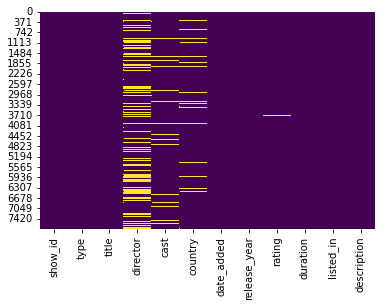

In [72]:
#Heatmap for null values
sns.heatmap(Netflix_df.isnull(),cbar=False,cmap='viridis')

In [73]:
#Handling missing values
Netflix_df.director.fillna("No Director",inplace=True)
Netflix_df.cast.fillna("No Cast",inplace=True)
Netflix_df.country.fillna("Country Unavailable",inplace=True)
Netflix_df.dropna(subset=["date_added",'rating'],inplace=True)

Here,Instead of simply dropping all the null values.We will treat each missing value is unavailable as dropping all missing values would be loss of important information.date_added and ratings have insignificant portion of data,so they are dropped from the dataset. 

In [50]:
Netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

In [15]:
Netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1730,s1731,Movie,Devrai,"Sumitra Bhave, Sunil Sukthankar","Atul Kulkarni, Sonali Kulkarni, Tushar Dalvi, ...",India,"January 1, 2018",2004,TV-PG,123 min,"Dramas, International Movies",After science student Shesh Shahi – a shy ecce...
6288,s6289,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong","January 1, 2021",2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...
7785,s7786,TV Show,Zumbo's Just Desserts,No Director,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
6915,s6916,Movie,The Super Parental Guardians,Joyce Bernal,"Vice Ganda, Coco Martin, Onyok Pineda, Awra Br...",Philippines,"March 21, 2019",2016,TV-14,115 min,"Action & Adventure, Comedies, International Mo...","Following his best friend's death, Arci takes ..."
4166,s4167,Movie,Mokalik (Mechanic),Kunle Afolayan,"Tooni Afolayan, Ayo Ogunshina, Dayo Akinpelu, ...",Nigeria,"September 1, 2019",2019,TV-14,100 min,"Dramas, International Movies",A young boy's life shifts when he's sent to wo...


In [51]:
#Checking if there are any duplicates
dupes=Netflix_df.duplicated()
dupes.sum()

0

In [74]:
#Converting date
Netflix_df["date_added"] = pd.to_datetime(Netflix_df['date_added']) 
Netflix_df['year']=Netflix_df['date_added'].dt.year
Netflix_df['month']=Netflix_df['date_added'].dt.month
Netflix_df['week']=Netflix_df['date_added'].dt.week

In [75]:
del Netflix_df['date_added']

In [54]:
Netflix_df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year,month,week
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,33
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,51
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,51
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,46
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1


In [55]:
Netflix_df['type'].values

array(['TV Show', 'Movie', 'Movie', ..., 'Movie', 'TV Show', 'Movie'],
      dtype=object)

## **Exploratory Data Analysis**

**Type of Netflix Content** 

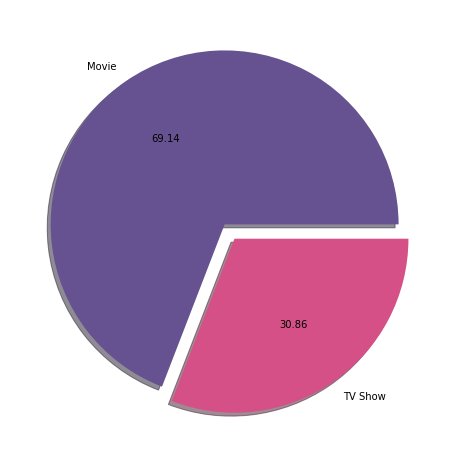

In [56]:
#No of movies and TV shows in attribute type

fig,ax1 = plt.subplots(figsize=(12,8))
explode = [0, 0.1]
colors = ["#665191","#d45087"]
types =Netflix_df.groupby('type').size()
plt.pie(types,labels=['Movie','TV Show'],explode=explode,colors=colors,shadow=True,autopct='%.2f')
plt.show()

**Conclusion**:There are more no of movies then TV Shows

**Ratings for Movies and TV Shows**

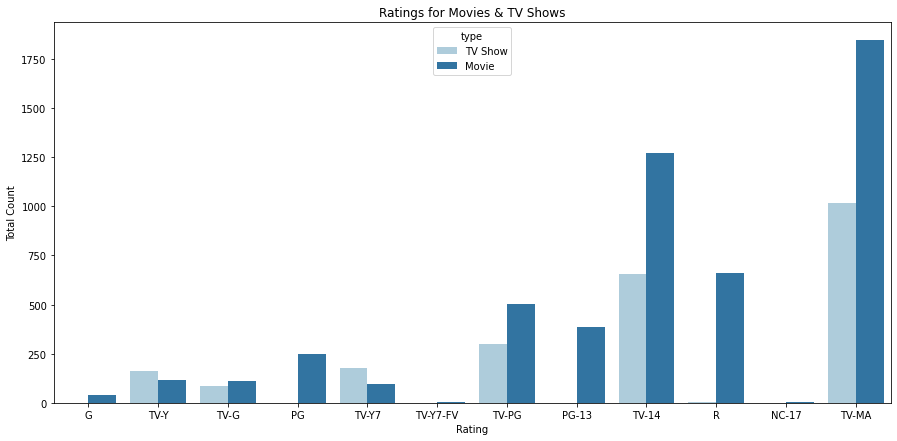

In [57]:
#Rating for movies and TV shows
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(Netflix_df.rating, hue=Netflix_df.type, order=order, palette='Paired');
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()


Note:ratings 'NR' and 'UR' in the visuals since they stand for unrated and non-rated content.

In [86]:
Netflix_df['release_year'].dtype

dtype('int64')

In [91]:
Netflix_df['release_year']=pd.to_datetime(Netflix_df['release_year'])

In [92]:
Netflix_df['release_year'].dtype

dtype('<M8[ns]')

In [29]:
from wordcloud import WordCloud

## **Wordcloud**

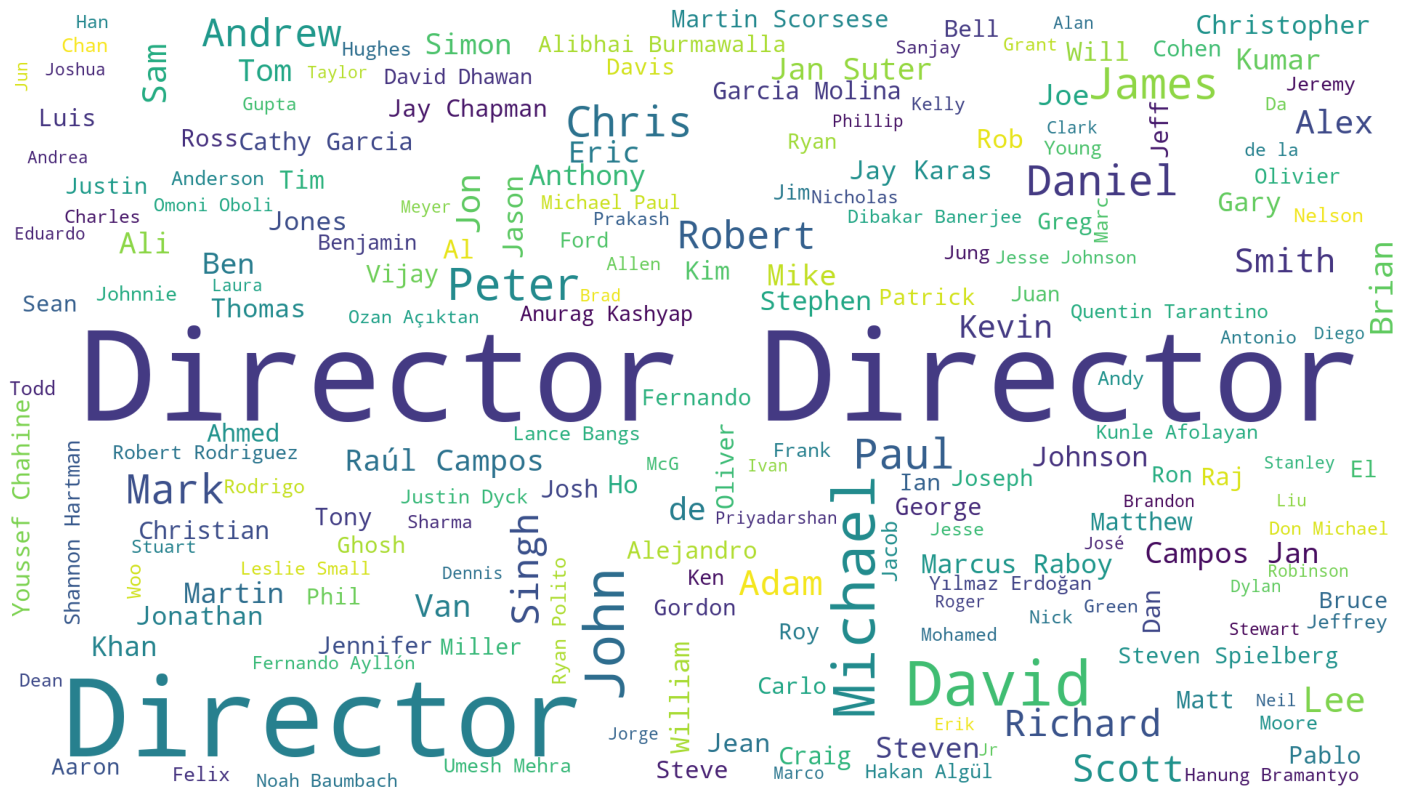

In [30]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Netflix_df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()



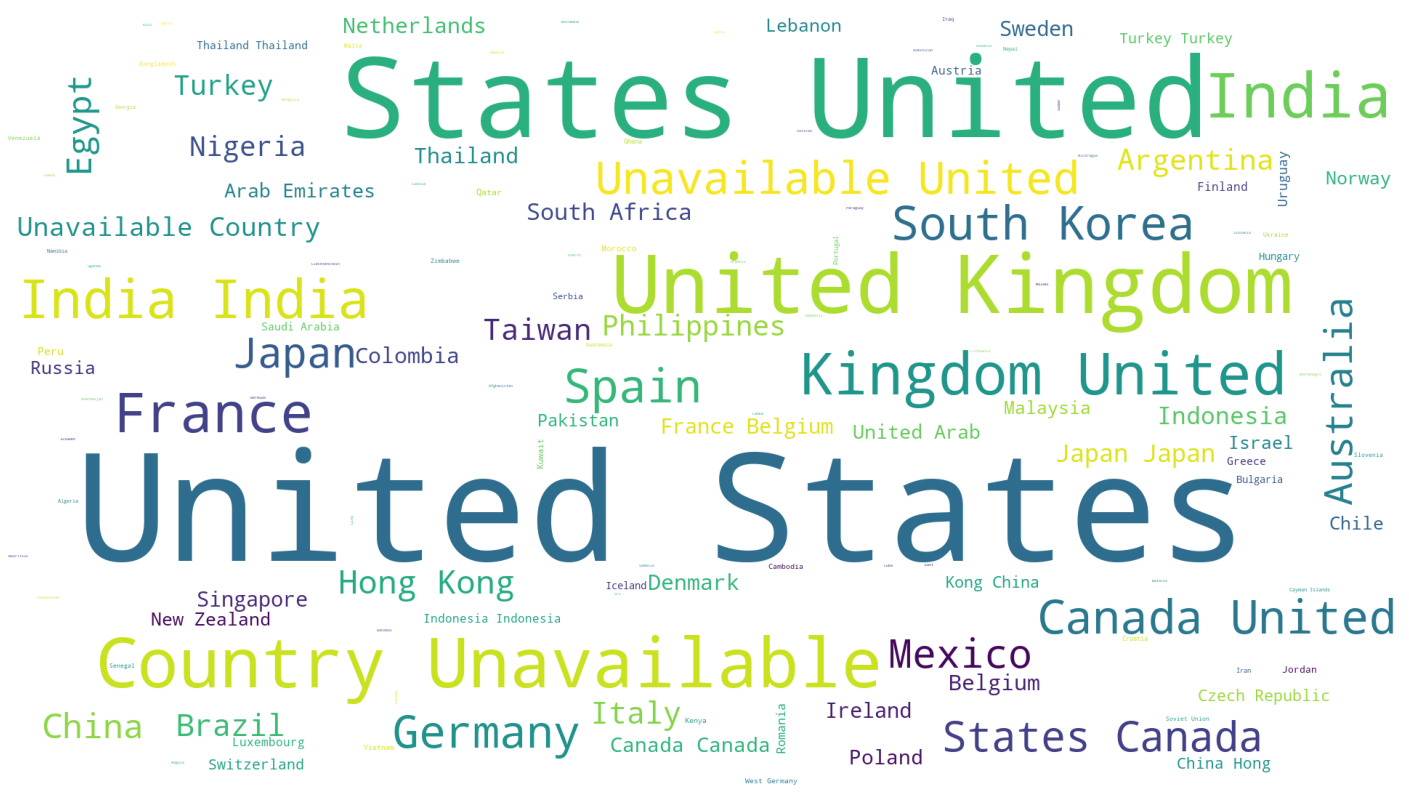

In [33]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Netflix_df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

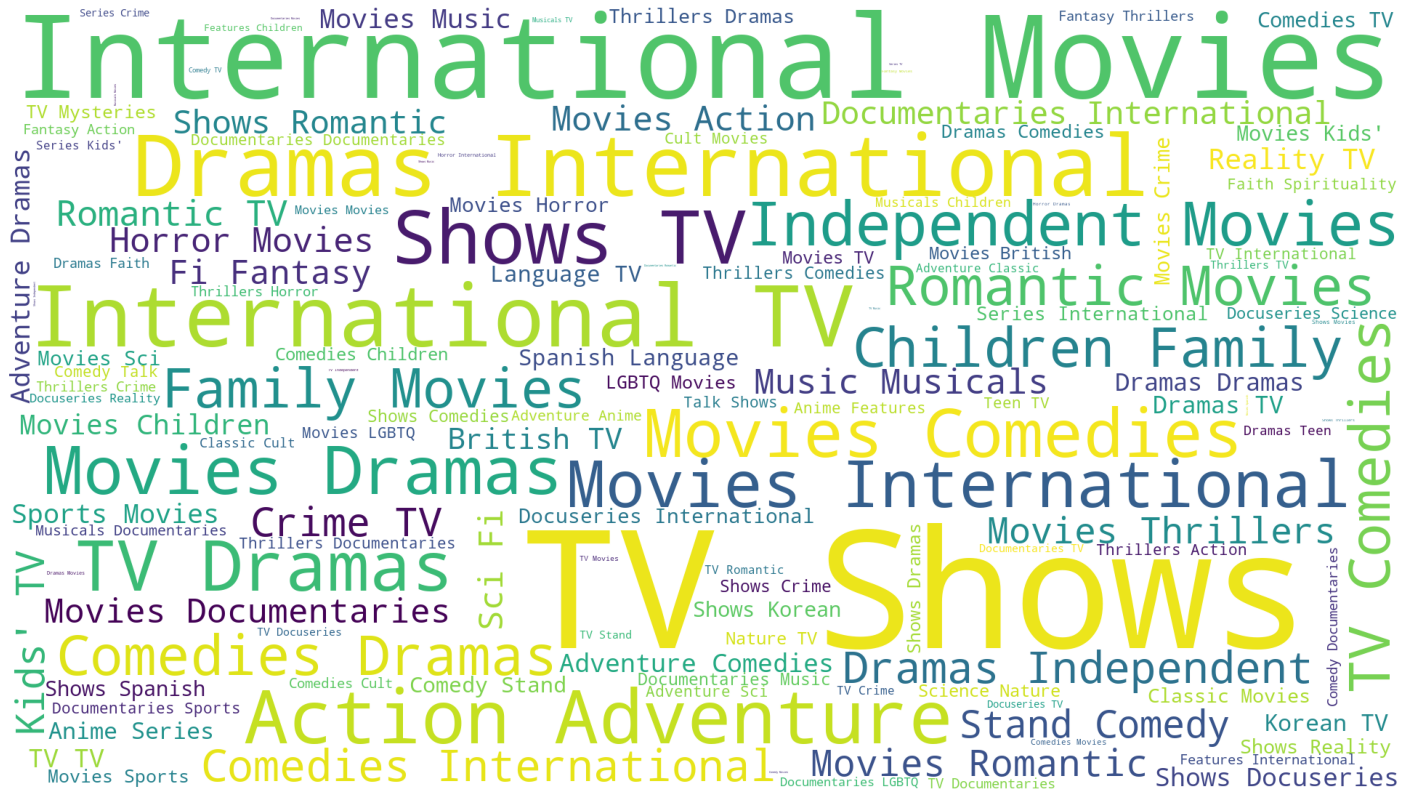

In [34]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Netflix_df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('listed.png')
plt.show()